# Numpy

In [14]:
### A solution
def replace_square(n):
    sqrt_n = np.sqrt(n)
    return n + (sqrt_n == sqrt_n.astype(int))*(-n + sqrt_n)

print(replace_square(7.0))
print(replace_square(np.arange(26)))

7.0
[ 0.  1.  2.  3.  2.  5.  6.  7.  8.  3. 10. 11. 12. 13. 14. 15.  4. 17.
 18. 19. 20. 21. 22. 23. 24.  5.]


In [15]:
### or using where
def replace_square2(n):
    sqrt_n = np.sqrt(n)
    return np.where(sqrt_n == sqrt_n.astype(int), 
                    sqrt_n, n)
        
print(replace_square2(7.0))       
print(replace_square2(np.arange(26)))

7.0
[ 0.  1.  2.  3.  2.  5.  6.  7.  8.  3. 10. 11. 12. 13. 14. 15.  4. 17.
 18. 19. 20. 21. 22. 23. 24.  5.]


# Scipy

### A solution using numpy-only and numerical integrals

In [25]:
# The energy range between 100 GeV and 100 TeV
E = np.logspace(-1, 2, 100) # In GeV
#print(E)

In [28]:
# Crab HEGRA spectrum
Gamma = 2.62
f0 = 2.83e-11 # TeV^-1 cm^-2 s^-1
E0 = 1 # TeV
dNdE = f0 * (E/E0)**-Gamma

In [39]:
integral = np.sum(np.sqrt(dNdE[1:] * dNdE[:-1]) * np.diff(E))
print(f'The numerical integral flux between {E[0]} TeV and {E[-1]} TeV is {integral} cm^-2 s^-1')
print(f'The integral using root is 7.28225e-10 [cm^-2s^-1]')

The numerical integral flux between 0.1 TeV and 100.0 TeV is 7.279848430097728e-10 cm^-2 s^-1
The integral using root is 7.28225e-10 [cm^-2s^-1]


In [45]:
# Crab MAGIC spectrum
alpha = 2.47
beta = 0.24
f0 = 2.83e-11 # TeV^-1 cm^-2 s^-1
E0 = 1 # TeV
dNdE_MAGIC = f0 * pow(E/E0, -alpha-beta*np.log10(E/E0))

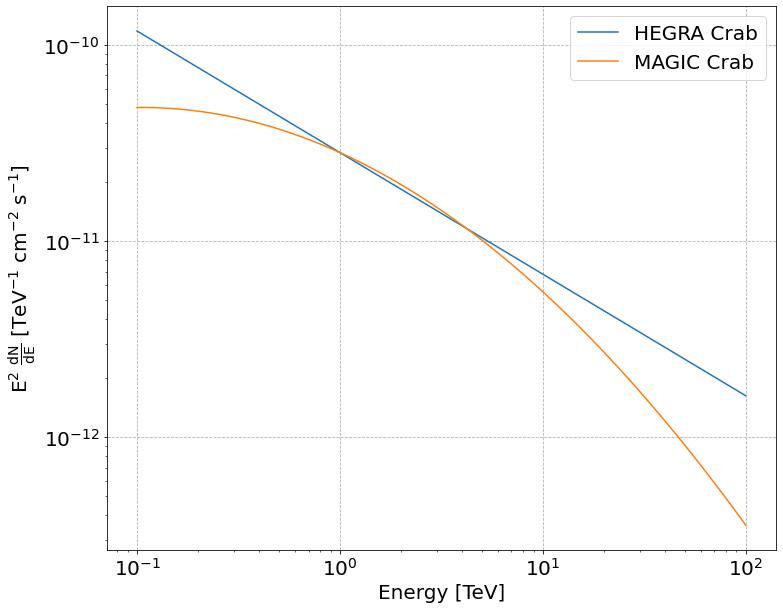

In [46]:
fig, ax = plt.subplots()
ax.set_xlabel("Energy [TeV]")
ax.set_ylabel(r'E$^2$ $\frac{\mathrm{dN}}{\mathrm{dE}}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
ax.grid(ls='--')
ax.loglog(E, E * E * dNdE, label='HEGRA Crab')
ax.loglog(E, E * E * dNdE_MAGIC, label='MAGIC Crab')

ax.legend()


# Matplotlib

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Small trick to get a larger display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [12]:
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12,10)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

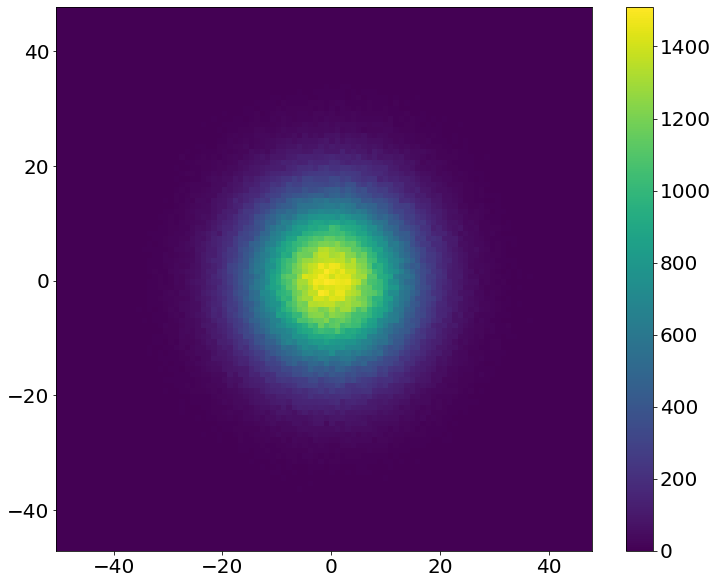

In [13]:
mean = [0, 0]
cov = [[100, 0], [0, 100]]

fig, ax = plt.subplots(figsize=(12,10))

x, y = np.random.multivariate_normal(mean, cov, 1000000).T
h2 = ax.hist2d(x, y, bins=100)
fig.colorbar(h2[3], ax=ax)
